# For processing UV-Vis spectroelectrochemistry data
### Rajiv Giridharagopal, rgiri@uw.edu

You can run this notebook by hitting **Shift+Enter** on each cell (including this one!)  
Or Cell-> "Run Cell and Select Below" from the menu

You will need to set the data_path below where it says "COPY_PATH_TO_FOLDER_HERE"  
> r'C:\Users\Raj\OneDrive\Documents\Word\uvvis'  


When you copy-paste, ONLY overwrite the part within quotes. Leave the r' ' intact  

Set the wavelength and potential that you want. These are for single-wavelength kinetics and for plotting spectra vs time, respectively  

### *IMPORTANT*: This saves the figures (usually to the data folder) and will save over existing figures!

#### Note 2: The first time this runs, it might not display figures. They'll still be saved, so just open them from Windows Explorer.

In [4]:
###### CHANGE THE VALUES IN THIS BLOCK #######
# 1) Set up the data path
# e.g. r'C:\Users\Raj\OneDrive\Documents\Word\uvvis'
data_path = r'COPY_PATH_TO_FOLDER_HERE'

# In case a user inevitably forgets to type a path in, this'll prompt them. This is buggy
if data_path == 'COPY_PATH_TO_FOLDER_HERE':
    from oect_load import file_open
    data_path = file_open(caption='Select folder to load from')
    print('Loading from', data_path)
    
    # For the sake of this demo notebook, I'll pull up some old data.
#data_path = r'C:\Users\cgbis\Documents\DATA\Ramsess\2019_2_21_ECHEM-P3HTD\P3H7ET_KCl'

# 2) Select the wavelength for extracting kinetics, and the potential for plotting time-dependent spectra
wavelength = 500
potential = 0.7

# 3) For saving the figures, add a small string to the filename. e.g. "20190825". By default it's blank. 
# No overwrite protection exists! Be careful
filenamestring = ''

# 4) Save path. By default this will just be in the same folder as your data
path = data_path

##############################################

Loading from C:/Users/cgbis/Documents/DATA/Ramsess/2019_2_21_ECHEM-P3HTD/P3H7ET_KCl


In [6]:
import uvvis
import cv
from matplotlib import pyplot as plt
import numpy as np
import pickle

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

# This block reads all the text files and saves them as a list of file paths for Python to read
steps, specs, volts, dedopesteps, dedopespecs = uvvis.read_files(data_path)

# Did you already load any data? If so, this avoids reprocessing. You can manually override this by changing to True
overwrite = False

if not overwrite:
    try:
        with open(path + r'\dopingdata.pkl', 'rb') as input:
            data = pickle.load(input)
        print('Loaded existing doping data')
        with open(path + r'\dedopingdata.pkl', 'rb') as input:
            data = pickle.load(input)
        print('Loaded existing dedoping data')
        print('If you REALLY want to reload all the data, change overwrite to True. You should not need to ever do this.')
    except:
        overwrite = True

if overwrite:
    ####### LOAD DATA ######
    data = uvvis.uv_vis(steps, specs, volts)

    # Actual processing of data. This takes a long time!!
    print('### Doping Data ###' )
    print('Processing data...hold on!')
    data.spec_echem_voltage(wavelength=wavelength)
    print('Generating spectra vs time')
    data.time_dep_spectra()
    print('Extracting single wavelength kinetics')
    data.single_wl_time(wavelength=wavelength, potential=potential)
    print('Current extraction')
    data.current_vs_time()
    print('Saving data as dopingdata.pkl')
    with open(path + '\dopingdata.pkl', 'wb') as output:

        pickle.dump(data, output, pickle.HIGHEST_PROTOCOL)

    if any(dedopespecs):
        dedata = uvvis.uv_vis(dedopesteps, dedopespecs, volts)
        print('### Dedoping Data ###' )
        # Actual processing of data. This takes a long time!!
        print('Processing data...hold on!')
        dedata.spec_echem_voltage(wavelength=wavelength)
        print('Generating spectra vs time')
        dedata.time_dep_spectra()
        print('Extracting single wavelength kinetics')
        dedata.single_wl_time(wavelength=wavelength, potential=potential)
        print('Current extraction')
        dedata.current_vs_time()
        print('Saving data as dedopingdata.pkl')
        with open(path + '\dedopingdata.pkl', 'wb') as output:

            pickle.dump(dedata, output, pickle.HIGHEST_PROTOCOL)
    else:
        dedata = []
    ##############################################

Loaded existing doping data
Loaded existing dedoping data
If you REALLY want to reload all the data, change overwrite to True. You should not need to ever do this.


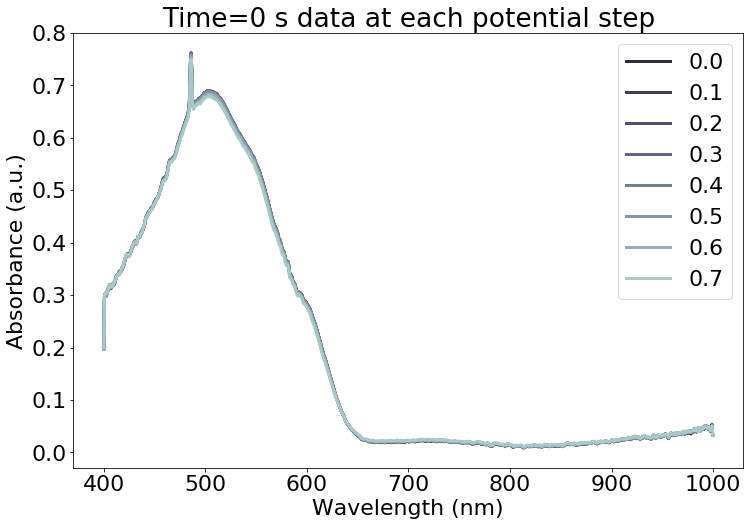

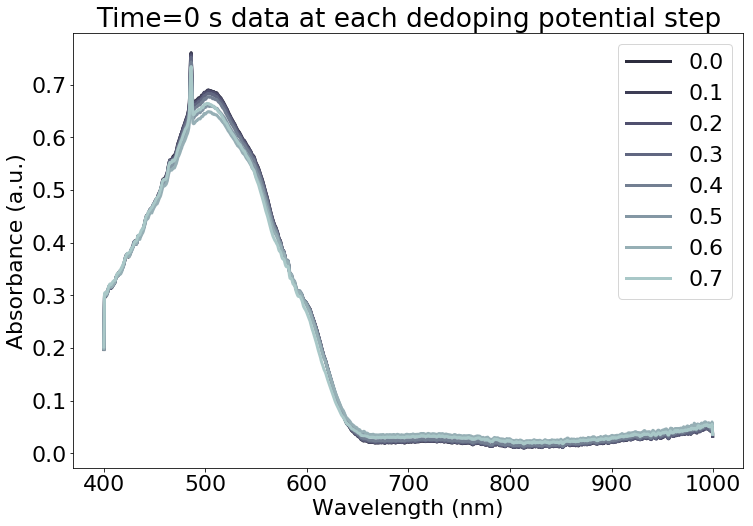

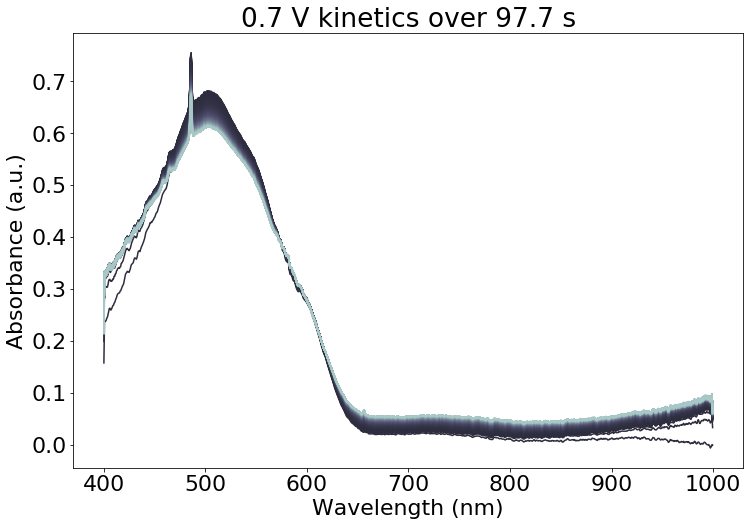

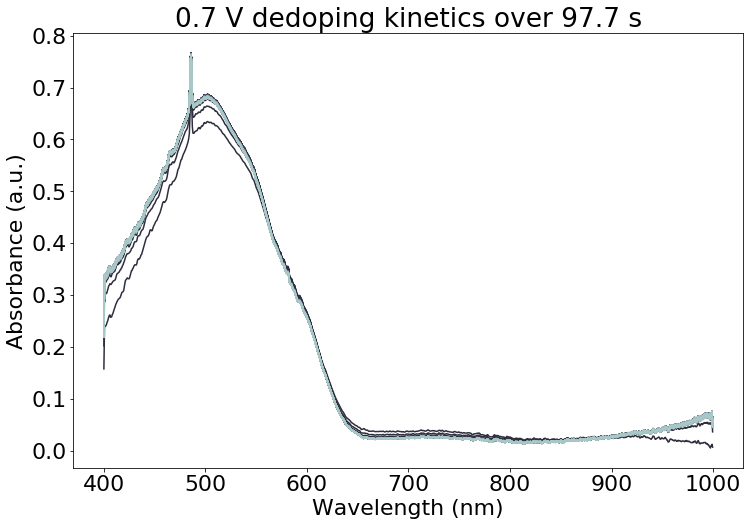

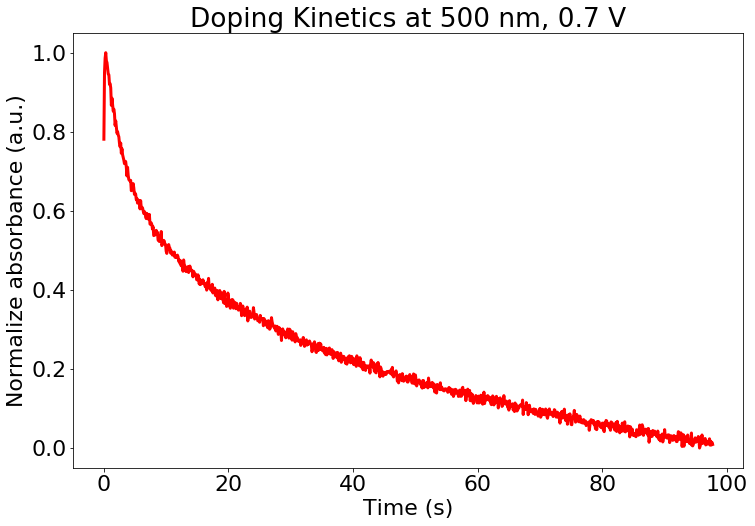

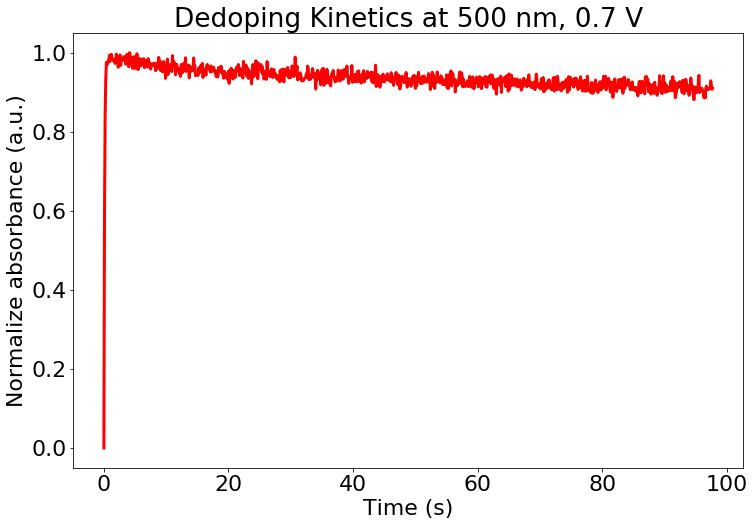

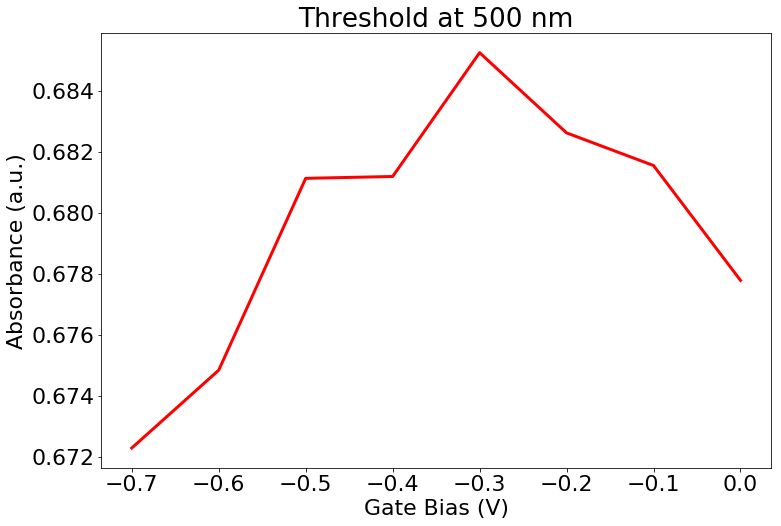

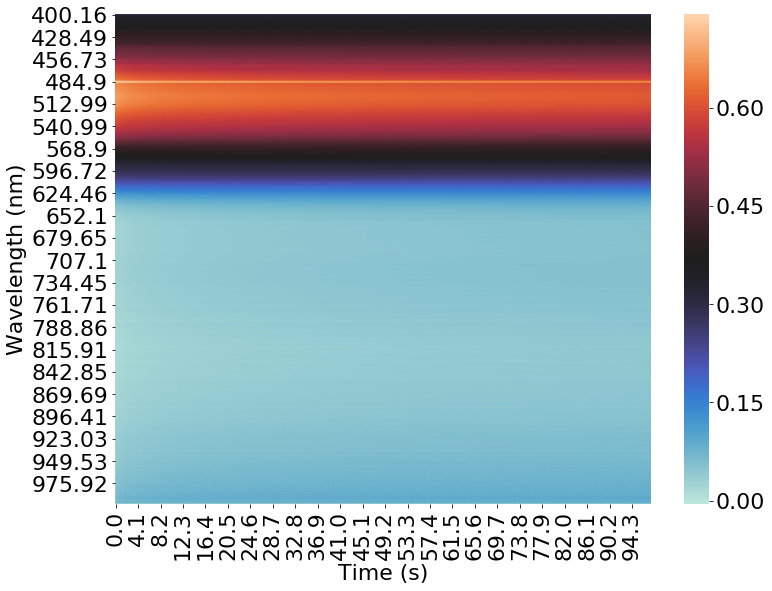

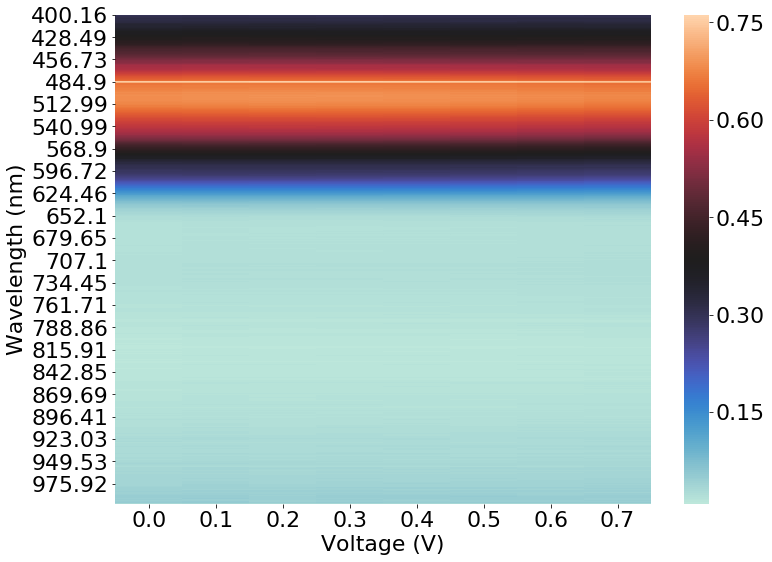

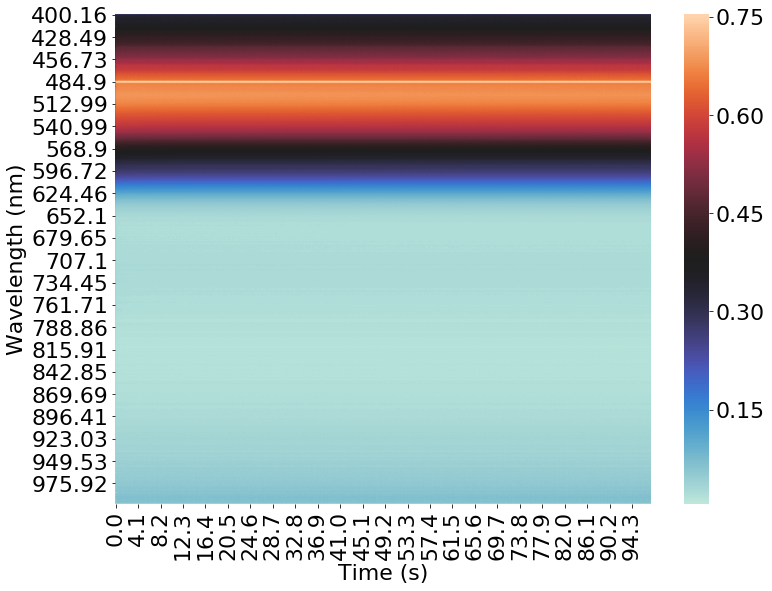

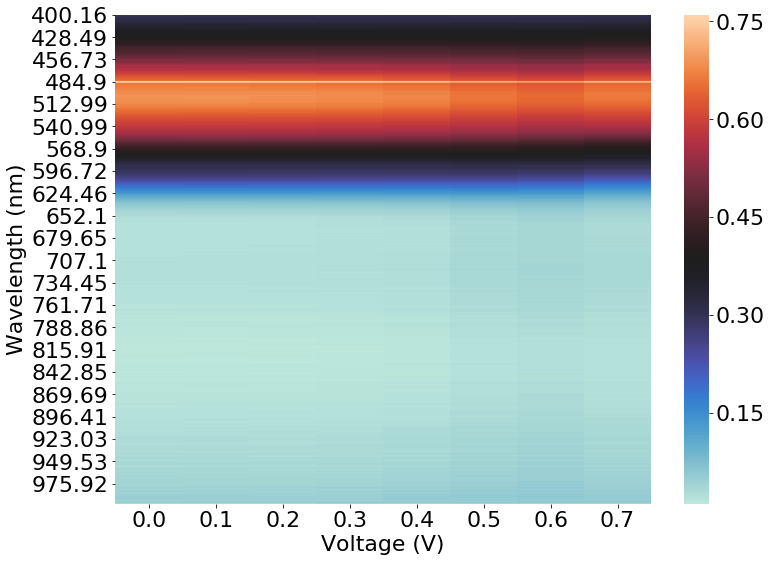

In [7]:
###### PLOT SPECTRA VS VOLTAGE ######
fig, ax = plt.subplots(nrows=1, figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': 22})

# This block just generates a cool colormap
# In the last line, you can replace "bone" with any colormap name from here: 
#     https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cm = np.linspace(0.2,0.75,len(data.spectra_sm.columns))
for i,cl in zip(data.spectra_sm, cm):
    ax.plot(data.spectra_sm[i], linewidth=3,
           color=plt.cm.bone(cl))  

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (a.u.)')
ax.legend(labels = data.potentials)
ax.set_title('Time=0 s data at each potential step')

plt.savefig(path + r'\\' + 'Doping Spectra, t=0 s'+filenamestring+'.jpg')

if dedata:
    fig, ax = plt.subplots(nrows=1, figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})

    # This block just generates a cool colormap
    # In the last line, you can replace "bone" with any colormap name from here: 
    #     https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    cm = np.linspace(0.2,0.75,len(data.spectra_sm.columns))
    for i,cl in zip(dedata.spectra_sm, cm):
        ax.plot(dedata.spectra_sm[i], linewidth=3,
               color=plt.cm.bone(cl))  

    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Absorbance (a.u.)')
    ax.legend(labels = dedata.potentials)
    ax.set_title('Time=0 s data at each dedoping potential step')

    plt.savefig(path + r'\\' + 'DeDoping Spectra, t=0 s'+filenamestring+'.jpg')
##############################################

###### PLOT SPECTRA VS VOLTAGE ######
fig, ax = plt.subplots(nrows=1, figsize=(12,8),  facecolor='white')

#potential = 0.7 # Change this to whatever voltage you want to plot

endtime = data.spectra_vs_time[potential].columns[-1]
cm = np.linspace(0.2,0.75,len(data.spectra_vs_time[potential].columns))
for i,cl in zip(data.spectra_vs_time[potential], cm):
    ax.plot(data.spectra_vs_time[potential][i], color=plt.cm.bone(cl*1))
    
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (a.u.)')
ax.set_title(str(potential) +' V kinetics over ' + str(endtime) + ' s')

plt.savefig(path + r'\\' + 'Kinetics at '+str(potential) +' V over ' + str(endtime) + ' s'+filenamestring+'.jpg')

if dedata:
    fig, ax = plt.subplots(nrows=1, figsize=(12,8),  facecolor='white')

    #potential = 0.7 # Change this to whatever voltage you want to plot

    endtime = dedata.spectra_vs_time[potential].columns[-1]
    cm = np.linspace(0.2,0.75,len(data.spectra_vs_time[potential].columns))
    for i,cl in zip(dedata.spectra_vs_time[potential], cm):
        ax.plot(dedata.spectra_vs_time[potential][i], color=plt.cm.bone(cl*1))

    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Absorbance (a.u.)')
    ax.set_title(str(potential) +' V dedoping kinetics over ' + str(endtime) + ' s')

    plt.savefig(path + r'\\' + 'Dedoping Kinetics at '+str(potential) +' V over ' + str(endtime) + ' s'+filenamestring+'.jpg')

##############################################

###### PLOT SINGLE WAVELENGTH KINETICS AND THRESHOLD ######
# Changes these two lines to whatever potential and wavelength you want
#potential = 0.7
#wavelength = 800

data.single_wl_time(potential=potential, wavelength = wavelength)
fig, ax = plt.subplots(nrows=1, figsize=(12,8),  facecolor='white')
uvvis.plot_time(data, ax=ax, **{'color':'r', 'linewidth': 3})
ax.set_title('Doping Kinetics at ' + str(wavelength) + ' nm, ' + str(potential) + ' V')

plt.savefig(path + r'\\' + 'Kinetics at ' + str(wavelength) + ' nm, ' + str(potential) + ' V'
            +filenamestring+'.jpg')

if dedata:
    dedata.single_wl_time(potential=potential, wavelength = wavelength)
    fig, ax = plt.subplots(nrows=1, figsize=(12,8),  facecolor='white')
    uvvis.plot_time(dedata, ax=ax, **{'color':'r', 'linewidth': 3})
    ax.set_title('Dedoping Kinetics at ' + str(wavelength) + ' nm, ' + str(potential) + ' V')

    plt.savefig(path + r'\\' + 'Dedope Kinetics at ' + str(wavelength) + ' nm, ' + str(potential) + ' V'
                +filenamestring+'.jpg')

fig, ax1 = plt.subplots(nrows=1, figsize=(12,8),  facecolor='white')
uvvis.plot_voltage(data, ax=ax1, **{'color':'r', 'linewidth': 3})
ax1.set_title('Threshold at ' + str(wavelength) + ' nm')

plt.savefig(path + r'\\' + 'Threshold at ' + str(wavelength) + ' nm'
            +filenamestring+'.jpg')

##############################################

###### SPECTROGRAMS ######
# Change potential to whatever voltage you want
# change cmap only if you know what that means
#potential = 0.7
kwargs = {}
kwargs['cmap'] = 'icefire'

# Sets up two dataframes for plotting
import pandas as pd
import seaborn as sns
wl = np.round(data.spectra_vs_time[potential].index.values, 2)
df = pd.DataFrame.copy(data.spectra_vs_time[potential])
df = df.set_index(wl)
dfv = pd.DataFrame.copy(data.spectra_sm)
dfv = dfv.set_index(wl)

# spectra vs time
fig, ax0 = plt.subplots(nrows = 1, figsize=(12,9), facecolor='white')
sns.heatmap(df,ax=ax0, **kwargs)    
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Wavelength (nm)')
plt.savefig(path + r'\\' + 'Spectrogram at ' + str(potential) + ' V '+filenamestring+'.jpg')

# spectra vs voltage
fig, ax1 = plt.subplots(nrows = 1, figsize=(12,9), facecolor='white')
sns.heatmap(dfv,ax=ax1, **kwargs)    
ax1.set_xlabel('Voltage (V)')
ax1.set_ylabel('Wavelength (nm)')

plt.savefig(path + r'\\' + 'Spectrogram at t = 0 s'
            +filenamestring+'.jpg')

##############################################

###### SPECTROGRAMS DEDOPING ######
if dedata:
        # Change potential to whatever voltage you want
    # change cmap only if you know what that means
    #potential = 0.7
    kwargs = {}
    kwargs['cmap'] = 'icefire'

    # Sets up two dataframes for plotting
    import pandas as pd
    import seaborn as sns
    wl = np.round(dedata.spectra_vs_time[potential].index.values, 2)
    df = pd.DataFrame.copy(dedata.spectra_vs_time[potential])
    df = df.set_index(wl)
    dfv = pd.DataFrame.copy(dedata.spectra_sm)
    dfv = dfv.set_index(wl)

    # spectra vs time
    fig, ax0 = plt.subplots(nrows = 1, figsize=(12,9), facecolor='white')
    sns.heatmap(df,ax=ax0, **kwargs)    
    ax0.set_xlabel('Time (s)')
    ax0.set_ylabel('Wavelength (nm)')
    plt.savefig(path + r'\\' + 'Dedoping Spectrogram at ' + str(potential) + ' V '+filenamestring+'.jpg')

    # spectra vs voltage
    fig, ax1 = plt.subplots(nrows = 1, figsize=(12,9), facecolor='white')
    sns.heatmap(dfv,ax=ax1, **kwargs)    
    ax1.set_xlabel('Voltage (V)')
    ax1.set_ylabel('Wavelength (nm)')

    plt.savefig(path + r'\\' + 'Dedoping Spectrogram at t = 0 s'
                +filenamestring+'.jpg')
    
##############################################